# Model Project 2025

**Table of contents**<a id='toc0_'></a>    
- 1. [Labor supply](#toc1_)    
  - 1.1. [Labor supply function](#toc1_1_)    
- 2. [Public good](#toc2_)    
  - 2.1. [Tax revenue and SWF](#toc2_1_)    
  - 2.2. [Optimal tax system](#toc2_2_)    
- 3. [Top tax](#toc3_)    
  - 3.1. [Labor supply](#toc3_1_)    
  - 3.2. [Labor supply function](#toc3_2_)    
  - 3.3. [Public good](#toc3_3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import time

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'axes.grid':True,'grid.color':'black','grid.alpha':'0.25','grid.linestyle':'--'})
plt.rcParams.update({'font.size': 14})
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
from Worker import WorkerClass 
from Government import GovernmentClass

## 1. <a id='toc1_'></a>[Labor supply](#toc0_)

In [4]:
def plot_optimal_labor_supply(p,par=None):

    # a. setup
    worker = WorkerClass(par)

    # b. evaluate
    min_ell = 2.0
    max_ell = worker.par.ell_max
    ells = np.linspace(min_ell,max_ell,100)

    Us = np.zeros_like(ells)
    FOCs = np.zeros_like(ells)

    for i,ell in enumerate(ells):
        Us[i] = worker.value_of_choice(p,ell)
        if np.isnan(worker.par.kappa):
            FOCs[i] = worker.FOC(p,ell)
        else:
            omega = 0 if worker.par.w*p*ell < worker.par.kappa else worker.par.omega
            FOCs[i] = worker.FOC(p,ell,omega=omega)
 
    # c. solve
    t0 = time.time()
    sol = worker.optimal_choice(p)
    t1 = time.time()
    t_OPT = t1 - t0
    print(f'OPT: ell = {sol.ell:.6f}, U = {sol.U:.6f} [{t_OPT:.6f} secs]')

    t0 = time.time()
    sol_FOC = worker.optimal_choice_FOC(p)
    t1 = time.time()
    t_FOC = t1 - t0
    print(f'FOC: ell = {sol_FOC.ell:.6f}, U = {sol_FOC.U:.6f} [{t_FOC:.6f} secs]')
    print(f'Difference in ell: {sol_FOC.ell-sol.ell:.2e}')
    print(f'Difference in U: {sol_FOC.U-sol.U:.2e}')

    # d. plot
    fig = plt.figure(figsize=(12,4))
    
    ax = fig.add_subplot(1,2,1)
    ax.plot(ells,Us,color=colors[0])
    
    ax.scatter(sol.ell,sol.U,marker='s',color=colors[0],s=25,zorder=5,
               label=f'OPT Solution [{t_OPT:.6f} secs]')
    ax.scatter(sol_FOC.ell,sol_FOC.U,s=15,color=colors[1],zorder=5,
               label=f'FOC Solution [{t_FOC:.6f} secs]')

    ax.legend()

    ax.set_xlabel(r'Labor, $\ell$')
    ax.set_title('Value-of-choice')

    ax = fig.add_subplot(1,2,2)
    
    if np.isnan(worker.par.kappa):

        ax.plot(ells,FOCs,color=colors[0])

    else:

        I = worker.par.w*p*ells < worker.par.kappa
        ax.plot(ells[~I], FOCs[~I],color=colors[0])
        ax.plot(ells[I], FOCs[I],color=colors[0])

    ax.scatter(sol.ell,0.0,marker='s',color=colors[0],s=25,zorder=5)
    ax.scatter(sol_FOC.ell,0.0,color=colors[1],s=15,zorder=5)

    ax.set_xlabel(r'Labor, $\ell$')
    ax.set_title('Error in FOC')

    plt.tight_layout()
    plt.show()

OPT: ell = 8.265578, U = 0.882060 [0.000325 secs]
FOC: ell = 8.265578, U = 0.882060 [0.000267 secs]
Difference in ell: 1.80e-08
Difference in U: -1.11e-16


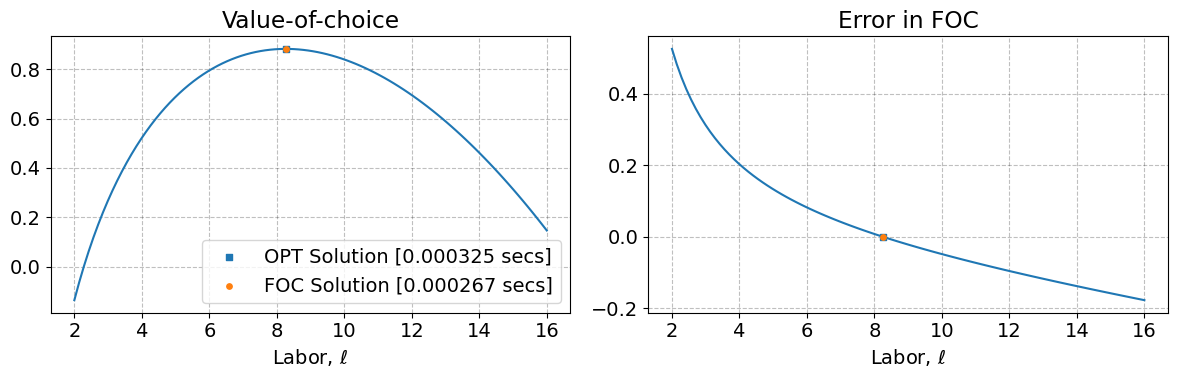

In [5]:
plot_optimal_labor_supply(1.0)

epsilon = 0.75

OPT: ell = 11.136048, U = 1.117038 [0.000264 secs]
FOC: ell = 11.136048, U = 1.117038 [0.000250 secs]
Difference in ell: -2.68e-07
Difference in U: 2.22e-16


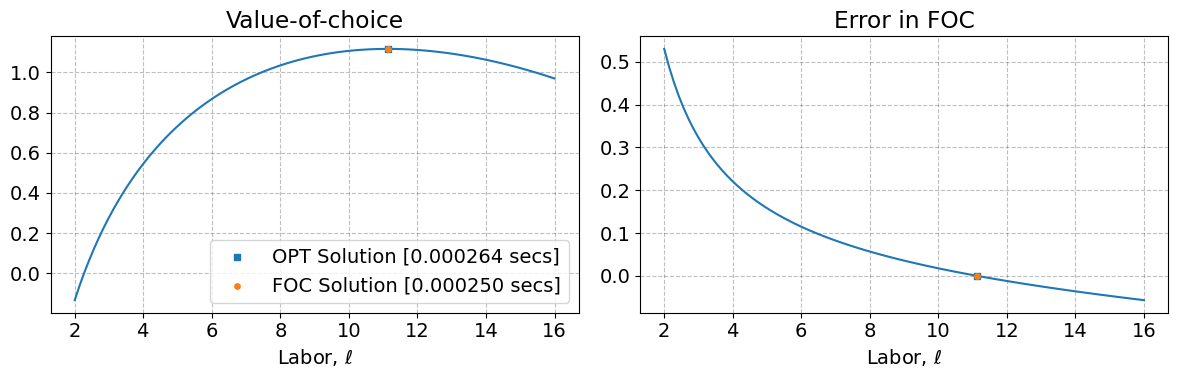

epsilon = 0.5

OPT: ell = 15.999996, U = 1.426863 [0.000604 secs]
FOC: ell = 16.000000, U = 1.426863 [0.000029 secs]
Difference in ell: 3.93e-06
Difference in U: 1.29e-08


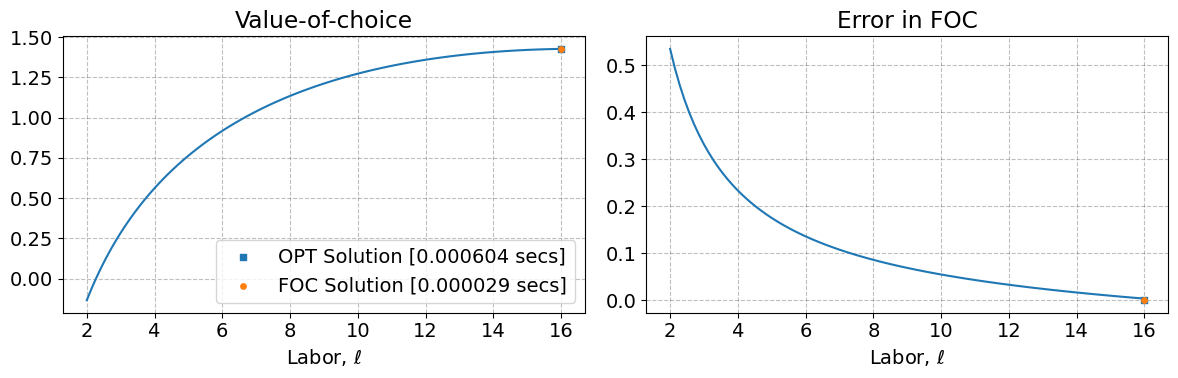

In [6]:
for epsilon in [0.75,0.50]:
    print(f'epsilon = {epsilon}\n')
    plot_optimal_labor_supply(1.0,par={'epsilon':epsilon})

### 1.1. <a id='toc1_1_'></a>[Labor supply function](#toc0_)

In [7]:
def plot_labor_supply_function(par=None):
    
    worker = WorkerClass(par)

    ells = np.zeros_like(worker.par.ps)
    c = np.zeros_like(worker.par.ps)

    for i,p in enumerate(worker.par.ps):
        sol = worker.optimal_choice_FOC(p)
        ells[i] = sol.ell
        c[i] = sol.c    

    fig = plt.figure(figsize=(12,4))
    ax = fig.add_subplot(1,2,1)
    ax.plot(worker.par.ps,ells,color=colors[0])
    ax.set_xlabel('productivity, $p_i$')
    ax.set_title('Labor Supply Function, $\ell^*(p_i)$')
    
    ax = fig.add_subplot(1,2,2)
    ax.plot(worker.par.ps,c,color=colors[0])
    ax.set_xlabel('productivity, $p_i$')
    ax.set_title('Consumption Function, $c^*(p_i)$')

    plt.show()

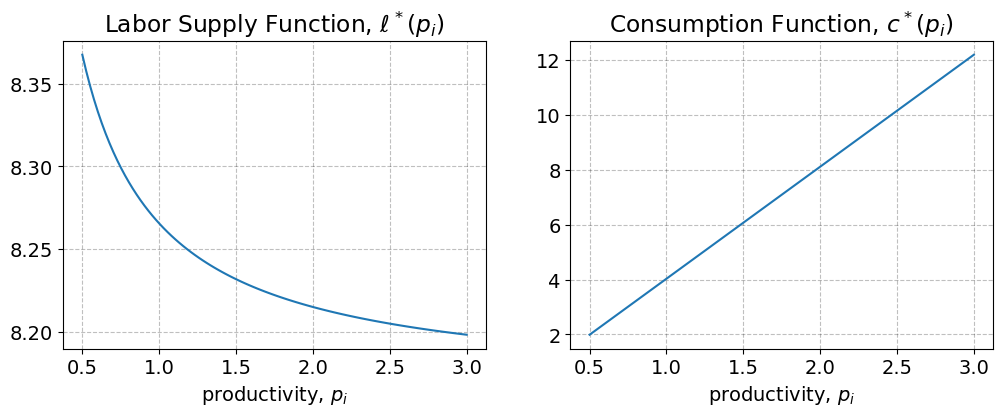

In [8]:
plot_labor_supply_function(par=None)

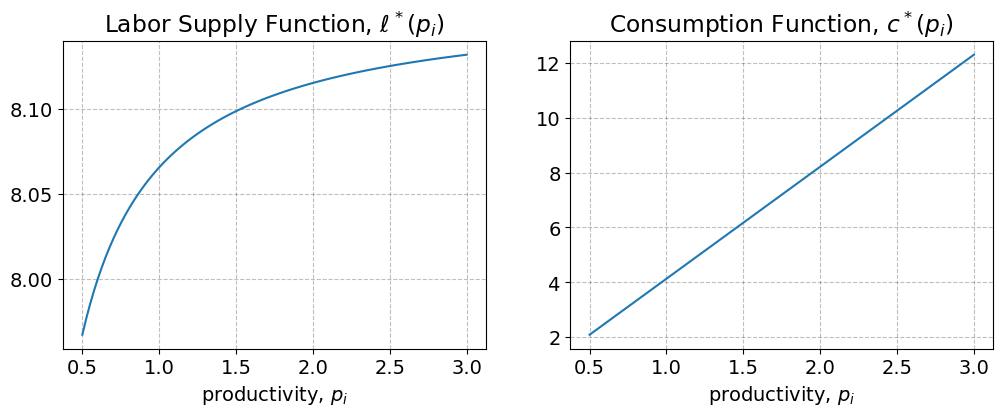

In [9]:
plot_labor_supply_function(par={'zeta':-0.1})

## 2. <a id='toc2_'></a>[Public good](#toc0_)

In [10]:
gov = GovernmentClass()

In [11]:
gov.draw_productivities()

### 2.1. <a id='toc2_1_'></a>[Tax revenue and SWF](#toc0_)

In [12]:
# a. solve workers
gov.solve_workers()

# b. tax revenue
tax_revnues = gov.tax_revenue()
print(f'Tax revenue: {tax_revnues:.6f}')

# c. SWF
SWF = gov.SWF()    
print(f'Social welfare: {SWF:.6f}')

Tax revenue: 417.911779
Social welfare: 174.045297


### 2.1. <a id='toc2_1_'></a>[Tax revenue and SWF curve](#toc0_)

In [13]:
zetas = [-0.1,0.0,0.1]
taus = np.linspace(0.01,0.80,30)

In [14]:
def plot_gov(taus,zetas):

    # a. tax revenues and SWF
    tax_revnues = np.ones((len(zetas),len(taus)))
    SWFs = np.nan*np.ones((len(zetas),len(taus)))

    for i,zeta in enumerate(zetas):
        for j,tau in enumerate(taus):

            # i. setup
            gov = GovernmentClass(par={'tau':tau,'zeta':zeta})
            gov.draw_productivities()

            # ii. feasibility check
            p_min = gov.par.ps.min()
            max_zeta = gov.max_post_tax_income(p_min)
            if zeta > max_zeta: continue

            # iii. solve
            gov.solve_workers()
            tax_revnues[i,j] = gov.tax_revenue()
            SWFs[i,j] = gov.SWF()    

    # b. grid search for optimum
    i,j = np.unravel_index(np.nanargmax(SWFs),SWFs.shape)
    
    zeta_ast = zetas[i]
    tau_ast = taus[j]
    SWF_max = SWFs[i,j]

    print(f'Optimal tau: {tau_ast:8.4f}')
    print(f'Optimal zeta: {zeta_ast:8.4f}')
    print(f'Maximum SWF: {SWF_max:8.4f}')      

    # c. plot
    fig = plt.figure(figsize=(12,4))

    ax = fig.add_subplot(1,2,1)
    for i,zeta in enumerate(zetas):
        ax.plot(taus,tax_revnues[i,:],label=fr'$\zeta$ = {zeta:.2f}')
    ax.set_xlabel('tax rate, $\tau$')
    ax.set_title('Total Tax Revenue')
    ax.legend()

    ax = fig.add_subplot(1,2,2)
    for i,zeta in enumerate(zetas):
        ax.plot(taus,SWFs[i,:],label=fr'$\zeta$ = {zeta:.2f}')
    ax.scatter([tau_ast],[SWF_max] ,color='black',zorder=5)
    ax.set_xlabel('tax rate, $\tau$')
    ax.set_title('Social Welfare Function (SWF)')
    ax.legend()

    fig.tight_layout()

    return tau_ast,zeta_ast     

Optimal tau:   0.0917
Optimal zeta:  -0.1000
Maximum SWF: 222.2067


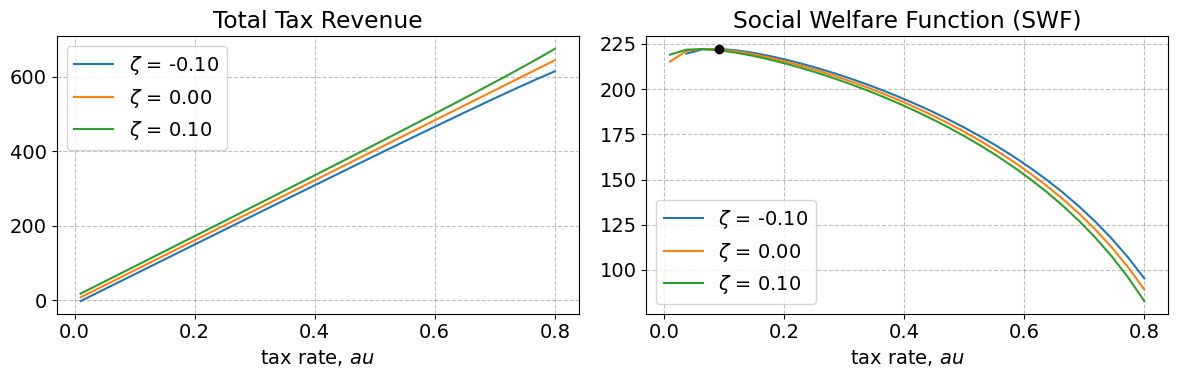

In [15]:
tau_ast,zeta_ast = plot_gov(taus,zetas)

### 2.2. <a id='toc2_2_'></a>[Optimal tax system](#toc0_)

In [16]:
gov.optimal_taxes(tau_ast,zeta_ast)

Optimal tau: 0.1368, Optimal zeta: -0.5236, SWF: 222.3841


**Check multistart:**

In [17]:
for zeta in [0.0,0.1,0.2]:
    gov.optimal_taxes(tau_ast,zeta)

Optimal tau: 0.1368, Optimal zeta: -0.5236, SWF: 222.3841
Optimal tau: 0.1368, Optimal zeta: -0.5236, SWF: 222.3841
Optimal tau: 0.1368, Optimal zeta: -0.5236, SWF: 222.3841


**Zoomed plot:**

Optimal tau:   0.1369
Optimal zeta:  -0.5236
Maximum SWF: 222.3841


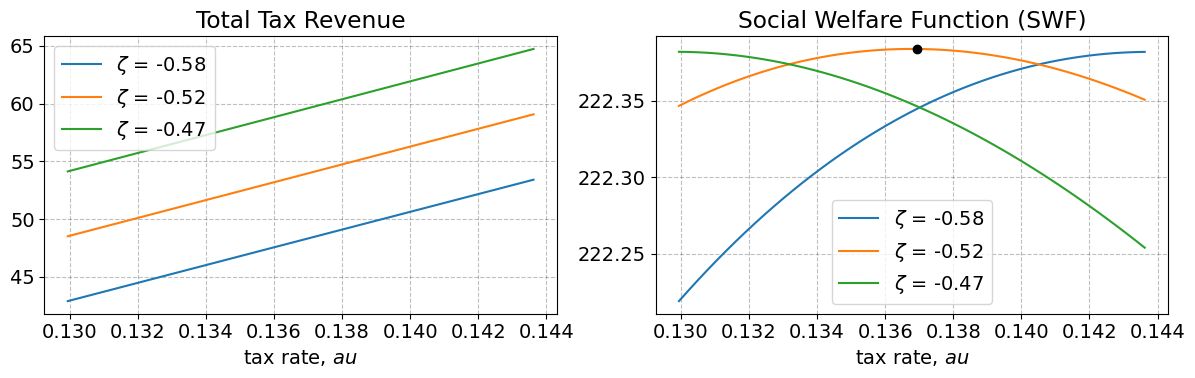

In [18]:
taus = np.linspace(gov.par.tau*0.95,gov.par.tau*1.05)
zetas = [gov.par.zeta-0.1*np.abs(gov.par.zeta),gov.par.zeta,gov.par.zeta+0.1*np.abs(gov.par.zeta)]
plot_gov(taus,zetas);

**Lorenz-curve:**

In [19]:
def lorenz_curve(gov,ax,**kwargs):

    c = gov.sol.c_opt
    c = np.sort(c)
    cum_c = np.cumsum(c)

    ax.plot(np.linspace(0,1,len(c)),cum_c/cum_c[-1],**kwargs)

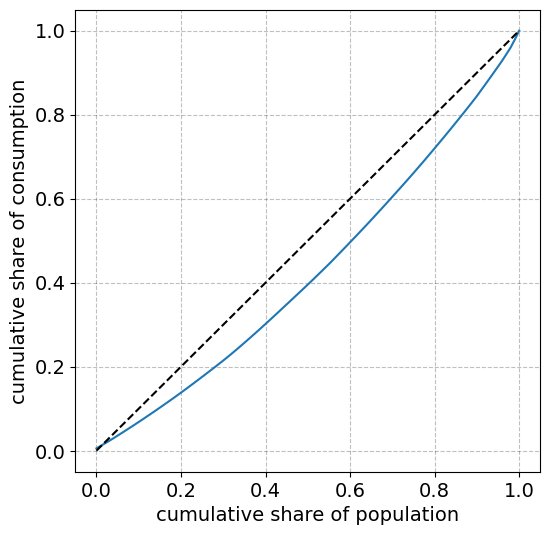

In [20]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
lorenz_curve(gov,ax,color=colors[0])
ax.plot([0,1],[0,1],color='black',linestyle='--')
ax.set_xlabel('cumulative share of population')
ax.set_ylabel('cumulative share of consumption');

## 3. <a id='toc3_'></a>[Top tax](#toc0_)

In [21]:
p = 1.0
kappa = 9.0
omega = 0.20

In [22]:
par = {'kappa':kappa,'omega':omega,'tau':gov.par.tau,'zeta':gov.par.zeta}

### 3.1. <a id='toc3_1_'></a>[Labor supply](#toc0_)

OPT: ell = 7.867329, U = 1.525685 [0.000295 secs]
FOC: ell = 7.867329, U = 1.525685 [0.000461 secs]
Difference in ell: 9.25e-09
Difference in U: 2.22e-16


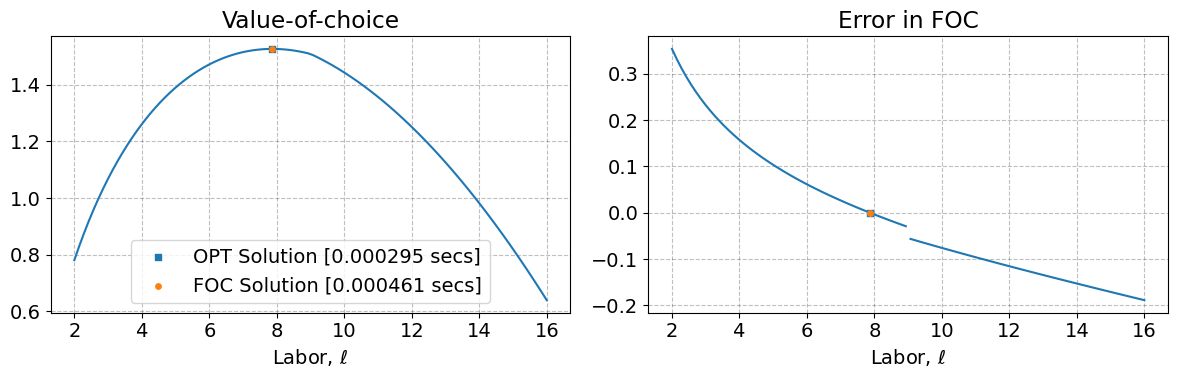

In [23]:
plot_optimal_labor_supply(p=1,par=par)

OPT: ell = 7.659572, U = 1.675335 [0.000543 secs]
FOC: ell = 7.659574, U = 1.675335 [0.000074 secs]
Difference in ell: 2.19e-06
Difference in U: 1.63e-08


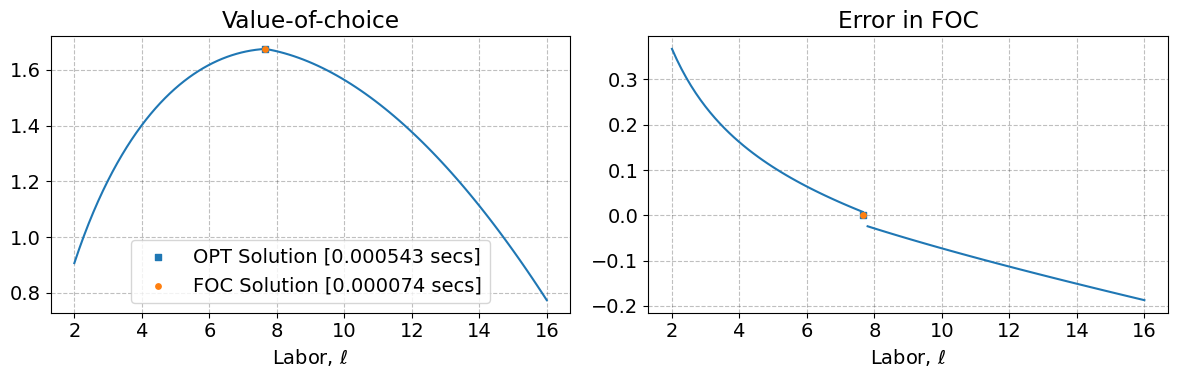

In [24]:
plot_optimal_labor_supply(p=1.175,par=par)

OPT: ell = 7.080231, U = 1.861237 [0.000257 secs]
FOC: ell = 7.080231, U = 1.861237 [0.000455 secs]
Difference in ell: -7.21e-07
Difference in U: 6.66e-15


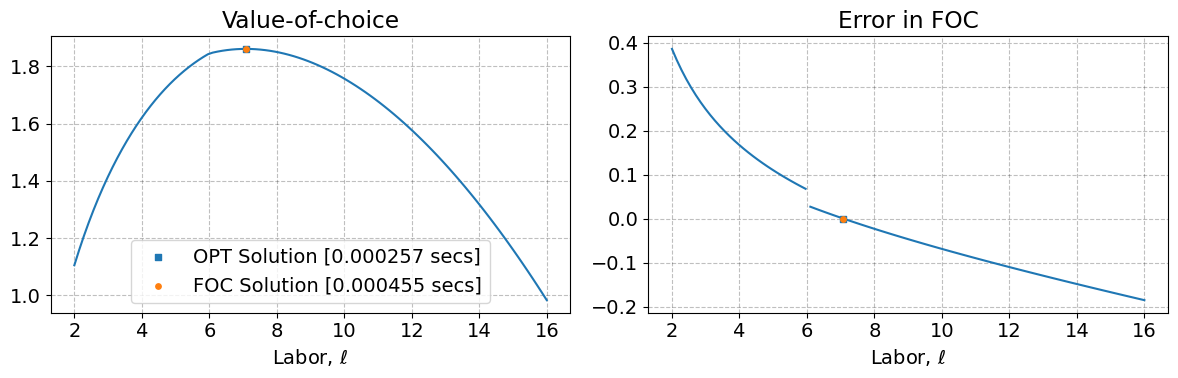

In [25]:
plot_optimal_labor_supply(p=1.5,par=par)

### 3.2. <a id='toc3_2_'></a>[Labor supply function](#toc0_)

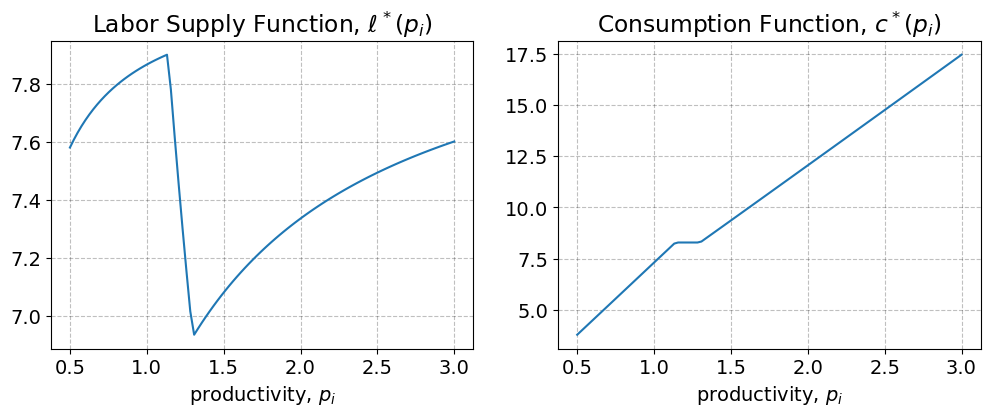

In [26]:
plot_labor_supply_function(par=par)

### 3.3. <a id='toc3_3_'></a>[Public good](#toc0_)

In [27]:
gov_top = GovernmentClass(par=par)
gov_top.draw_productivities()

In [28]:
gov_top.solve_workers()
gov_top.tax_revenue()
print(f'Social welfare with        : {gov.SWF():.6f}')
print(f'Social welfare with top-tax: {gov_top.SWF():.6f}')

Social welfare with        : 222.384073
Social welfare with top-tax: 221.933762


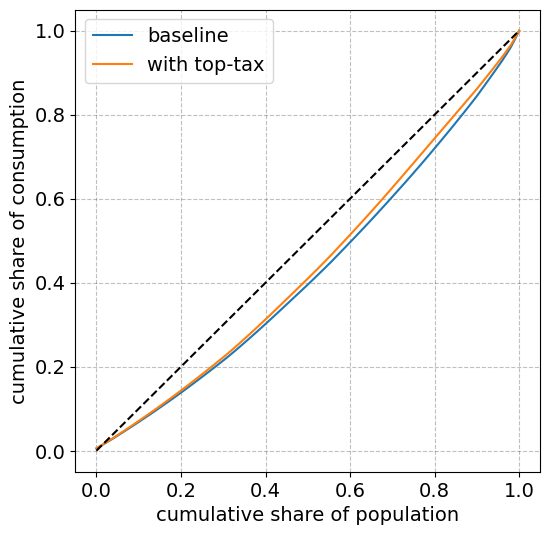

In [29]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)

lorenz_curve(gov,ax,color=colors[0],label='baseline')
lorenz_curve(gov_top,ax,color=colors[1],label='with top-tax')

ax.legend()
ax.plot([0,1],[0,1], color='black', linestyle='--')
ax.set_xlabel('cumulative share of population')
ax.set_ylabel('cumulative share of consumption');